<a href="https://colab.research.google.com/github/Vijaykumar-HealthGIS/NLP/blob/main/Advance_spatial_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas geopy statsmodels matplotlib seaborn libpysal esda geopandas   ##Install Required Packages

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 9.0 MB/s eta 0:00:00


Saving 11042025_Result_data.csv to 11042025_Result_data.csv
✅ File uploaded and loaded successfully!
🔍 Preview of data:
   Latitude  Longitude                                English_Translation  \
0  29.58182   74.32938  Discussions on every intersections of the city...   
1  28.63576   77.22445  Ki Mei Ka Heavens Life Bhopal Mei Builder Ka A...   
2 -37.81400  144.96332  Explore the BJPs 2024 Constitution Amendments ...   
3  17.38405   78.45636  BJP MLA Aleti Maheshwar Reddy is trying to mak...   
4  20.00000   77.00000  Income Tax Slab 2024 . . . pic.twitter.com/O2d...   

   Segment  WC  Analytic  Clout  Authentic   Tone   WPS  ...  nonflu  filler  \
0        1  38     98.73  55.75      70.28  61.63   7.6  ...     0.0     0.0   
1        1  13       NaN    NaN        NaN  99.00  13.0  ...     0.0     0.0   
2        1  20     89.52  69.20      63.35    NaN  10.0  ...     0.0     0.0   
3        1  18     98.16    NaN       1.00    NaN  18.0  ...     0.0     0.0   
4        1   8   

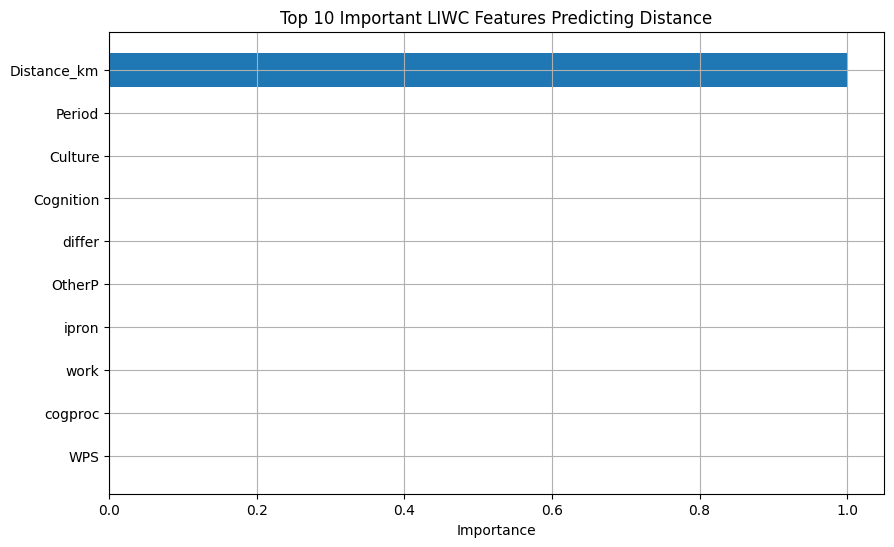


✅ Final data saved as 'Processed_Tweets_With_Distance.csv'


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from geopy.distance import geodesic
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np

# Step 2: Upload CSV file from your computer
from google.colab import files  # Only for Google Colab, remove if using Jupyter
uploaded = files.upload()       # Select your CSV file from your computer

# Step 3: Load uploaded CSV file (auto-detect filename)
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("✅ File uploaded and loaded successfully!")
print("🔍 Preview of data:")
print(df.head())

# Step 4: Drop rows without coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Step 5: Add event location: Delhi (central point)
delhi_coords = (28.6139, 77.2090)

# Step 6: Calculate distance from each tweet to Delhi
df['Distance_km'] = df.apply(lambda row: geodesic((row['Latitude'], row['Longitude']), delhi_coords).km, axis=1)

# Step 7: Filter extreme distances (optional)
df = df[df['Distance_km'] <= 3000]

# Step 8: Select sentiment-related features
ignore = ['Latitude', 'Longitude', 'English_Translation', 'Segment']
features = [col for col in df.columns if col not in ignore]

# Step 9: Feature Importance using Random Forest
X = df[features]
y = df['Distance_km']
X_scaled = StandardScaler().fit_transform(X)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

# Step 10: Plot top 10 important features
importances = model.feature_importances_
important_df = pd.DataFrame({'Feature': features, 'Importance': importances})
important_df = important_df.sort_values(by='Importance', ascending=False)

print("\n📊 Top 10 Important Features:")
print(important_df.head(10))

plt.figure(figsize=(10, 6))
plt.barh(important_df['Feature'][:10][::-1], important_df['Importance'][:10][::-1])
plt.xlabel('Importance')
plt.title('Top 10 Important LIWC Features Predicting Distance')
plt.grid(True)
plt.show()

# Step 11: Save final file
df.to_csv("Processed_Tweets_With_Distance.csv", index=False)
print("\n✅ Final data saved as 'Processed_Tweets_With_Distance.csv'")

In [ ]:
pip install folium

In [ ]:
# Step 1: Import libraries
import pandas as pd
import folium
from folium.plugins import HeatMap
from google.colab import files

# Step 2: Upload your file
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 3: Read CSV file
df = pd.read_csv(filename)

# Step 4: Clean and filter data for mapping
# Make sure there are no missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Optional: Choose a variable like 'Tone' or 'Clout' for weighting the heatmap
# Here we'll use 'Tone' — you can change it
df['weight'] = df['Tone'].fillna(0)

# Step 5: Create Folium base map centered over India
m = folium.Map(location=[22.9734, 78.6569], zoom_start=5)

# Step 6: Add HeatMap layer
heat_data = [[row['Latitude'], row['Longitude'], row['weight']] for index, row in df.iterrows()]
HeatMap(heat_data, radius=8, blur=15).add_to(m)

# Step 7: Display the map
m.save("heatmap_tweets.html")
m

Saving 11042025_Result_data.csv to 11042025_Result_data (1).csv


In [ ]:
# Step 1: Import required libraries
import pandas as pd
import folium
from folium.plugins import HeatMap
from google.colab import files

# Step 2: Upload the CSV file
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 3: Load the dataset
df = pd.read_csv(filename)

# Step 4: Preprocess: remove missing lat/lon
df = df.dropna(subset=['Latitude', 'Longitude'])

# Optional: Select a LIWC sentiment variable as weight
df['weight'] = df['Tone'].fillna(0)

# Step 5: Create the base map centered on India
m = folium.Map(location=[22.9734, 78.6569], zoom_start=5)

# Step 6: Prepare data for heatmap: [lat, lon, weight]
heat_data = [[row['Latitude'], row['Longitude'], row['weight']] for index, row in df.iterrows()]

# Step 7: Add heatmap to map
HeatMap(heat_data, radius=8, blur=15, max_zoom=10).add_to(m)

# Step 8: Add custom HTML legend
legend_html = '''
     <div style="
     position: fixed;
     bottom: 50px;
     left: 50px;
     width: 220px;
     height: 120px;
     background-color: white;
     border:2px solid grey;
     z-index:9999;
     font-size:14px;
     padding: 10px;
     box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
     ">
     <b>Heatmap Legend</b><br>
     <i style="background: #00f; width: 18px; height: 10px; display: inline-block"></i>&nbsp; Low Tone<br>
     <i style="background: #0ff; width: 18px; height: 10px; display: inline-block"></i>&nbsp; Medium-Low<br>
     <i style="background: #0f0; width: 18px; height: 10px; display: inline-block"></i>&nbsp; Medium<br>
     <i style="background: #ff0; width: 18px; height: 10px; display: inline-block"></i>&nbsp; Medium-High<br>
     <i style="background: #f00; width: 18px; height: 10px; display: inline-block"></i>&nbsp; High Tone
     </div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Step 9: Save the map and display it
m.save("heatmap_with_legend.html")
m

Saving 11042025_Result_data.csv to 11042025_Result_data (4).csv


In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from google.colab import files

# Upload CSV file from computer
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load CSV
df = pd.read_csv(filename)

# Select the LIWC variable to visualize
df['weight'] = df['Tone']  # You can change 'Tone' to any other column

# Drop rows with missing location or weight
df = df.dropna(subset=['Latitude', 'Longitude', 'weight'])

# Create base map
m = folium.Map(location=[22.9734, 78.6569], zoom_start=5)

# Build heat data
heat_data = [[row['Latitude'], row['Longitude'], row['weight']] for index, row in df.iterrows()]

# Add heat map
HeatMap(heat_data, radius=8, blur=15, max_zoom=10).add_to(m)

# Custom legend
legend_html = '''
     <div style="
     position: fixed;
     bottom: 50px;
     left: 50px;
     width: 220px;
     height: 120px;
     background-color: white;
     border:2px solid grey;
     z-index:9999;
     font-size:14px;
     padding: 10px;
     box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
     ">
     <b>Heatmap Legend</b><br>
     <i style="background: #00f; width: 18px; height: 10px; display: inline-block"></i>&nbsp; Low Tone<br>
     <i style="background: #0ff; width: 18px; height: 10px; display: inline-block"></i>&nbsp; Medium-Low<br>
     <i style="background: #0f0; width: 18px; height: 10px; display: inline-block"></i>&nbsp; Medium<br>
     <i style="background: #ff0; width: 18px; height: 10px; display: inline-block"></i>&nbsp; Medium-High<br>
     <i style="background: #f00; width: 18px; height: 10px; display: inline-block"></i>&nbsp; High Tone
     </div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Save and display
m.save("heatmap_with_legend_fixed.html")
m

Saving 11042025_Result_data.csv to 11042025_Result_data (6).csv


In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from google.colab import files

# Upload CSV file from computer
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load CSV
df = pd.read_csv(filename)

# Select the LIWC variable to visualize
df['weight'] = df['Tone']  # You can change 'Tone' to any other column

# Drop rows with missing location or weight
df = df.dropna(subset=['Latitude', 'Longitude', 'weight'])

# Create base map
m = folium.Map(location=[22.9734, 78.6569], zoom_start=5)

# Build heat data
heat_data = [[row['Latitude'], row['Longitude'], row['weight']] for index, row in df.iterrows()]

# Add heat map
HeatMap(heat_data, radius=8, blur=15, max_zoom=10).add_to(m)

# Custom legend
legend_html = '''
     <div style="
     position: fixed;
     bottom: 50px;
     left: 50px;
     width: 220px;
     height: 120px;
     background-color: white;
     border:2px solid grey;
     z-index:9999;
     font-size:14px;
     padding: 10px;
     box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
     ">
     <b>Heatmap Legend</b><br>
     <i style="background: #00f; width: 18px; height: 10px; display: inline-block"></i>&nbsp; Low Tone<br>
     <i style="background: #0ff; width: 18px; height: 10px; display: inline-block"></i>&nbsp; Medium-Low<br>
     <i style="background: #0f0; width: 18px; height: 10px; display: inline-block"></i>&nbsp; Medium<br>
     <i style="background: #ff0; width: 18px; height: 10px; display: inline-block"></i>&nbsp; Medium-High<br>
     <i style="background: #f00; width: 18px; height: 10px; display: inline-block"></i>&nbsp; High Tone
     </div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Save and display
m.save("heatmap_with_legend_fixed.html")
m

Saving 11042025_Result_data.csv to 11042025_Result_data (7).csv


In [ ]:
pip install pandas numpy geopy semopy graphviz

In [ ]:
# STEP 1: Upload CSV from your computer
from google.colab import files
uploaded = files.upload()  # Upload your .csv file

# STEP 2: Load required libraries
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from semopy import Model, Optimizer
import matplotlib.pyplot as plt

# STEP 3: Load the uploaded CSV file
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# STEP 4: Clean and prepare data
# Drop rows where key variables are missing
df = df.dropna(subset=['Latitude', 'Longitude', 'Tone', 'Cognition', 'Affect'])

# STEP 5: Calculate geodesic distance from Delhi (event center)
delhi_coords = (28.6139, 77.2090)  # Delhi latitude and longitude
df['distance_km'] = df.apply(lambda row: geodesic((row['Latitude'], row['Longitude']), delhi_coords).km, axis=1)

# STEP 6: Standardize variables
df['Tone_scaled'] = (df['Tone'] - df['Tone'].mean()) / df['Tone'].std()
df['Distance_scaled'] = (df['distance_km'] - df['distance_km'].mean()) / df['distance_km'].std()
df['Cognition_scaled'] = (df['Cognition'] - df['Cognition'].mean()) / df['Cognition'].std()
df['Affect_scaled'] = (df['Affect'] - df['Affect'].mean()) / df['Affect'].std()

# STEP 7: Define SEM model structure
model_desc = """
Tone_scaled ~ Distance_scaled
Cognition_scaled ~ Tone_scaled
Affect_scaled ~ Tone_scaled
"""

# STEP 8: Initialize and load data into the SEM model
model = Model(model_desc)
model.load_dataset(df)  # This step is needed to load the dataset into the model

# STEP 9: Optimize the model
opt = Optimizer(model)
opt.optimize()

# STEP 10: Display parameter estimates
print("=== Parameter Estimates ===")
print(model.inspect())

# STEP 11: Display the model summary (fit statistics included)
print("\n=== Model Summary ===")
print(model.summary())  # Use summary() to check fit statistics

# STEP 12: Save SEM results to CSV (optional)
results = model.inspect()
results.to_csv("sem_results_output.csv", index=False)
print("\n✅ SEM results saved as: sem_results_output.csv")


Saving 11042025_Result_data.csv to 11042025_Result_data (11).csv
=== Parameter Estimates ===
               lval  op              rval  Estimate  Std. Err    z-value  \
0       Tone_scaled   ~   Distance_scaled   0.00000  0.007104   0.000000   
1  Cognition_scaled   ~       Tone_scaled   0.00000  0.010046   0.000000   
2     Affect_scaled   ~       Tone_scaled   0.00000  0.010046   0.000000   
3       Tone_scaled  ~~       Tone_scaled   0.49995  0.007103  70.384657   
4     Affect_scaled  ~~     Affect_scaled   0.49995  0.007103  70.384657   
5  Cognition_scaled  ~~  Cognition_scaled   0.49995  0.007103  70.384657   

   p-value  
0      1.0  
1      1.0  
2      1.0  
3      0.0  
4      0.0  
5      0.0  

=== Model Summary ===


AttributeError: 'Model' object has no attribute 'summary'

In [ ]:
pip install pandas geopy libpysal statsmodels seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 21.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import os

# Function to load data safely
def load_data(file_path):
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        print("Data loaded successfully.")
        return df
    else:
        raise FileNotFoundError(f"The file '{file_path}' does not exist. Please check the path.")

# Function to prompt for a new file path
def get_file_path():
    while True:
        file_path = input("Please enter a valid path to your data file: ")
        if os.path.exists(file_path):
            return file_path
        else:
            print(f"The file '{file_path}' does not exist. Please try again.")

# Specify the initial path to your data file (you can adjust this)
file_path = r"C:\Users\Vijay Kumar\Downloads\2tb vivek\2tb vivek\IIMA Twitter data\Distance based\distance_B\W_Event\11042025_Result_data.csv"

try:
    df = load_data(file_path)
except FileNotFoundError as e:
    print(e)
    file_path = get_file_path()
    df = load_data(file_path)

# Assuming the DataFrame is successfully loaded

# Define the location of the event in Delhi
delhi_location = (28.6139, 77.2090)  # Latitude, Longitude of New Delhi

# Function to calculate distance
def calculate_distance(row):
    return great_circle((row['Latitude'], row['Longitude']), delhi_location).kilometers

# Add a new column with distance to the DataFrame
df['distance_km'] = df.apply(calculate_distance, axis=1)

# Set up the model (for example, using OLS)
# You can include different variables based on your analysis
X = df[['distance_km', 'Clout', 'Affect', 'Emotion', 'Cognition']]  # Example predictors
y = df['sentiment']  # Target variable (replace with your sentiment variable)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the ordinary least squares model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Visualizing results, e.g., plotting residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True,
               scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, color='blue', linestyle='--')
plt.show()

# For spatial econometrics models
# Create a spatial weights matrix (this is an example, adapt as needed)
coords = list(zip(df['Latitude'], df['Longitude']))
w = libpysal.weights.KNN.from_array(np.array(coords), k=5)  # K-nearest neighbors, adjust k as necessary

# Fit a spatial lag model
spatial_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(spatial_model.summary())

# You can also implement spatial error or spatial lag models based on your requirements using f.e. PySAL


The file 'C:\Users\Vijay Kumar\Downloads\2tb vivek\2tb vivek\IIMA Twitter data\Distance based\distance_B\W_Event\11042025_Result_data.csv' does not exist. Please check the path.
Please enter a valid path to your data file: "C:\Users\Vijay Kumar\Downloads\2tb vivek\2tb vivek\IIMA Twitter data\Distance based\distance_B\W_Event\11042025_Result_data.csv"
The file '"C:\Users\Vijay Kumar\Downloads\2tb vivek\2tb vivek\IIMA Twitter data\Distance based\distance_B\W_Event\11042025_Result_data.csv"' does not exist. Please try again.
Please enter a valid path to your data file: file_path = "C:\\Users\\Vijay Kumar\\Downloads\\2tb vivek\\2tb vivek\\IIMA Twitter data\\Distance based\\distance_B\\W_Event\\11042025_Result_data.csv"
The file 'file_path = "C:\\Users\\Vijay Kumar\\Downloads\\2tb vivek\\2tb vivek\\IIMA Twitter data\\Distance based\\distance_B\\W_Event\\11042025_Result_data.csv"' does not exist. Please try again.


KeyboardInterrupt: Interrupted by user

In [ ]:
file_path = r"C:\Users\Vijay Kumar\Downloads\2tb vivek\2tb vivek\IIMA Twitter data\Distance based\distance_B\W_Event\11042025_Result_data.csv"

In [ ]:
import os

file_path = r"C:\Users\Vijay Kumar\Downloads\2tb vivek\2tb vivek\IIMA Twitter data\Distance based\distance_B\W_Event\11042025_Result_data.csv"
if os.path.isfile(file_path):
    print("File exists.")
else:
    print("File does not exist.")


File does not exist.


In [ ]:
# STEP 1: Install required packages
!pip install geopandas pysal folium esda

# STEP 2: Import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from libpysal.weights import DistanceBand
from esda.moran import Moran
import folium
from folium.plugins import HeatMap

# STEP 3: Upload CSV file from your computer
from google.colab import files
uploaded = files.upload()

# STEP 4: Load the CSV file (replace with actual uploaded filename)
import io
df = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))
print("✅ Data loaded successfully!")

# STEP 5: Drop rows with missing Lat/Lon or sentiment
df = df.dropna(subset=['Latitude', 'Longitude', 'tone_pos'])  # Use appropriate sentiment column

# STEP 6: Create GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# STEP 7: Reproject to meters for distance calculation (e.g., UTM)
gdf = gdf.to_crs(epsg=3857)

# STEP 8: Spatial Weights - create a distance band (e.g., 100 km)
w = DistanceBand.from_dataframe(gdf, threshold=100000, silence_warnings=True)

# STEP 9: Spatial Autocorrelation (Moran's I) for tone_pos
moran = Moran(gdf['tone_pos'], w)
print(f"📊 Moran's I: {moran.I}")
print(f"📈 p-value: {moran.p_norm}")

# STEP 10: Create Heatmap using folium
gdf = gdf.to_crs(epsg=4326)  # Convert back to WGS84 for folium
m = folium.Map(location=[28.6139, 77.2090], zoom_start=5)  # Center on Delhi

heat_data = [[row['Latitude'], row['Longitude'], row['tone_pos']] for idx, row in gdf.iterrows()]
heat_data = [point for point in heat_data if not any(pd.isnull(point))]

HeatMap(heat_data, radius=10, blur=15).add_to(m)

# Optional: Add legend (basic HTML)
legend_html = '''
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 200px; height: 90px;
     background-color: white; z-index:9999; font-size:14px;
     border:2px solid grey; padding: 10px;">
     <b>Legend</b><br>
     Red: High Sentiment<br>
     Green: Low Sentiment<br>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# STEP 11: Show map
m


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 79.6 MB/s eta 0:00:0

Saving 11042025_Result_data.csv to 11042025_Result_data.csv
✅ Data loaded successfully!
📊 Moran's I: 0.022870334284948887
📈 p-value: 4.1309924419772374e-36


In [ ]:
# ======================
# 📦 STEP 1: Install required libraries
# ======================
!pip install -q geopandas shapely libpysal spreg mgwr

# ======================
# 📊 STEP 2: Import libraries
# ======================
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from libpysal.weights import KNN
from spreg import ML_Lag, ML_Error
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
from sklearn.preprocessing import StandardScaler

# ======================
# 📁 STEP 3: Upload and load your CSV file
# ======================
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# ======================
# 🧹 STEP 4: Clean and sample for memory safety
# ======================
df = df.dropna(subset=['Latitude', 'Longitude', 'Tone', 'Clout', 'Analytic', 'Authentic', 'Affect', 'emo_pos', 'emo_neg'])
df_sample = df.sample(5000, random_state=42).copy()

# ======================
# 🌍 STEP 5: Convert to GeoDataFrame
# ======================
geometry = [Point(xy) for xy in zip(df_sample['Longitude'], df_sample['Latitude'])]
gdf = gpd.GeoDataFrame(df_sample, geometry=geometry)
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs(epsg=3857)  # Convert to projected CRS (meters)

# ======================
# 📐 STEP 6: Create KNN spatial weights (ensures convergence)
# ======================
coords = np.array([(point.x, point.y) for point in gdf.geometry])
w = KNN(coords, k=8)  # You can try k=8 to start; tweak if needed
w.transform = 'r'  # Row-standardize

# ======================
# 📈 STEP 7: Prepare dependent & independent variables
# ======================
dependent_var = 'Tone'
independent_vars = ['Clout', 'Analytic', 'Authentic', 'Affect', 'emo_pos', 'emo_neg']

y = gdf[dependent_var].values.reshape(-1, 1)
X = gdf[independent_vars].values
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# ======================
# 🧠 STEP 8A: Spatial Lag Model (SAR)
# ======================
model_sar = ML_Lag(y, X_std, w=w, name_y=dependent_var, name_x=independent_vars)
print("\n📌 SAR Model Summary:\n", model_sar.summary)

# ======================
# 🧠 STEP 8B: Spatial Error Model (SEM)
# ======================
model_sem = ML_Error(y, X_std, w=w, name_y=dependent_var, name_x=independent_vars)
print("\n📌 SEM Model Summary:\n", model_sem.summary)

# ======================
# 🧠 STEP 8C: Spatial Durbin Model (SDM)
# ======================
model_sdm = ML_Lag(y, X_std, w=w, slx_lags=1, name_y=dependent_var, name_x=independent_vars)
print("\n📌 SDM Model Summary:\n", model_sdm.summary)

# ======================
# 🧠 STEP 8D: Geographically Weighted Regression (GWR)
# ======================
# Convert back to geographic for GWR
gdf_gwr = gdf.to_crs(epsg=4326)
coords_gwr = np.array([(point.x, point.y) for point in gdf_gwr.geometry])
bw = Sel_BW(coords_gwr, y, X_std).search()
print(f"\n🔍 GWR Bandwidth: {bw}")
gwr_model = GWR(coords_gwr, y, X_std, bw).fit()
print("\n📌 GWR Model Summary:\n")
print(gwr_model.summary())


Saving 11042025_Result_data.csv to 11042025_Result_data (2).csv


/usr/local/lib/python3.11/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 16 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)



📌 SAR Model Summary:
 REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :        Tone                Number of Observations:        5000
Mean dependent var  :     41.8392                Number of Variables   :           8
S.D. dependent var  :     41.4380                Degrees of Freedom    :        4992
Pseudo R-squared    :      0.2550
Spatial Pseudo R-squared:  0.2505
Log likelihood      : -24980.8748
Sigma-square ML     :   1278.9872                Akaike info criterion :   49977.750
S.E of regression   :     35.7629                Schwarz criterion     :   50029.887

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
----------------------------------------

/usr/local/lib/python3.11/dist-packages/spreg/ml_error.py:184: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  res = minimize_scalar(


In [ ]:
#Add Distance from Delhi (Before Modeling)
# 📦 Step 1: Install required packages
!pip install geopandas geopy libpysal spreg mgwr

# 📁 Step 2: Upload your data file
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 📊 Step 3: Load libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import great_circle
import numpy as np
from sklearn.preprocessing import StandardScaler

# Spatial econometrics
from libpysal.weights import DistanceBand
from spreg import ML_Lag, ML_Error
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# 📍 Step 4: Load and clean data
df = pd.read_csv(filename)
df = df.dropna(subset=['Latitude', 'Longitude'])

# 🧭 Step 5: Create GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# 🗺️ Step 6: Add distance from Delhi (event center)
delhi_coords = (28.6139, 77.2090)
gdf['distance_from_delhi_km'] = gdf.geometry.apply(
    lambda point: great_circle((point.y, point.x), delhi_coords).km
)
print("✅ Distance from Delhi added.")

# ✏️ Step 7: Define dependent & independent variables
dependent_var = 'Tone'
independent_vars = ['Analytic', 'Authentic', 'distance_from_delhi_km']
gdf = gdf.dropna(subset=[dependent_var] + independent_vars)

# 📐 Step 8: Prepare X, y, coordinates
y = gdf[dependent_var].values.reshape(-1, 1)
X = gdf[independent_vars].values
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
coords = list(zip(gdf.geometry.x, gdf.geometry.y))

# 🧱 Step 9: Distance-based weight matrix (100 km threshold)
w = DistanceBand(coords, threshold=100000, binary=True, silence_warnings=True)

# 📈 Step 10: Spatial Models

# A. SAR (Spatial Lag)
model_sar = ML_Lag(y, X_std, w=w, name_y=dependent_var, name_x=independent_vars)
print("📌 SAR Model Summary:\n", model_sar.summary)

# B. SEM (Spatial Error)
model_sem = ML_Error(y, X_std, w=w, name_y=dependent_var, name_x=independent_vars)
print("📌 SEM Model Summary:\n", model_sem.summary)

# C. GWR
# Project GeoDataFrame to meters for GWR
gdf_gwr = gdf.to_crs(epsg=3857)
u = gdf_gwr.geometry.x.values
v = gdf_gwr.geometry.y.values
coords_gwr = np.column_stack([u, v])

# Select bandwidth & fit
bw = Sel_BW(coords_gwr, y, X_std).search()
print(f"📏 Optimal GWR bandwidth: {bw}")
gwr_model = GWR(coords_gwr, y, X_std, bw).fit()
print("📌 GWR Model Summary:\n", gwr_model.summary())

# 🎯 Step 11: Model Comparison Table
model_results = {
    "Model": ["SAR", "SEM", "GWR"],
    "AIC": [model_sar.aic, model_sem.aic, gwr_model.aic],
    "Log-Likelihood": [model_sar.logll, model_sem.logll, gwr_model.llf],
    "R²": [model_sar.pr2, model_sem.pr2, gwr_model.R2]
}
results_df = pd.DataFrame(model_results)
print("\n📊 Model Comparison Table:\n", results_df)

# 🗺️ Step 12: GWR Coefficient Maps

# Store GWR coefficients back into GeoDataFrame
for i, var in enumerate(independent_vars):
    gdf_gwr[f'gwr_coef_{var}'] = gwr_model.params[:, i]

# Plotting all GWR coefficient maps
fig, axes = plt.subplots(1, len(independent_vars), figsize=(18, 6))
for i, var in enumerate(independent_vars):
    ax = axes[i]
    gdf_gwr.plot(column=f'gwr_coef_{var}', cmap='coolwarm', legend=True, ax=ax)
    ax.set_title(f'GWR Coef: {var}')
    ax.axis('off')

plt.suptitle("🗺️ GWR Coefficient Maps (Effect Strength Varies by Location)", fontsize=16)
plt.tight_layout()
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.2/388.2 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.6 MB/s eta 0:00:00


Saving 11042025_Result_data.csv to 11042025_Result_data.csv
✅ Distance from Delhi added.


In [2]:
# ⚠️ Install dependencies only ONCE
!pip install geopandas libpysal spreg mgwr

# 🔁 Import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from math import radians, sin, cos, sqrt, atan2

# 📂 Upload data
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# 🔍 Keep only relevant columns & downcast to float32
cols_needed = ['Latitude', 'Longitude', 'Tone', 'Clout', 'Analytic', 'Authentic']
df = df[cols_needed].dropna().copy()
df = df.astype('float32')

# 📍 Delhi coordinates
lat0, lon0 = 28.6139, 77.2090
R = 6371  # Earth's radius in km

# 📏 Vectorized haversine distance function
lat = np.radians(df['Latitude'].values)
lon = np.radians(df['Longitude'].values)
lat0_rad = radians(lat0)
lon0_rad = radians(lon0)

dlat = lat - lat0_rad
dlon = lon - lon0_rad
a = np.sin(dlat / 2)**2 + np.cos(lat0_rad) * np.cos(lat) * np.sin(dlon / 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
df['distance_km'] = R * c

# 🗺️ Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

print("✅ Cleaned, converted to GeoDataFrame, and distance from Delhi added.")
gdf.head()


Saving 11042025_Result_data.csv to 11042025_Result_data (2).csv
✅ Cleaned, converted to GeoDataFrame, and distance from Delhi added.


,Latitude,Longitude,Tone,Clout,Analytic,Authentic,distance_km,geometry
0,29.581820,74.329376,61.630001,55.750000,98.730003,70.279999,299.761646,POINT (74.32938 29.58182)
10,25.594080,85.135628,86.790001,66.750000,94.500000,1.000000,853.171756,POINT (85.13563 25.59408)
13,28.496149,77.536011,2.860000,54.959999,69.050003,2.730000,34.518249,POINT (77.53601 28.49615)
14,26.919621,75.787811,1.000000,40.060001,99.000000,93.949997,234.612215,POINT (75.78781 26.91962)
15,20.000000,77.000000,20.230000,80.239998,81.209999,59.990002,958.055368,POINT (77 20)
